In [120]:
import pandas as pd
import numpy as np
import dash
from dash import Dash
import seaborn as sns
from dash import html
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.graphics.gofplots import qqplot
from matplotlib.lines import Line2D

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

In [121]:
df = pd.read_csv('/Users/vishal/Desktop/Way to New World/University/01_All_Semesters/02_Semester/01_Visualization of Complex Data/05_Projects/Patient-Survival-Prediction---Dash-Visualization/dataset/Dataset.csv')

# Checking for Null Values

In [122]:
Null_Values = df.isna().sum()/len(df)
Null_Values.sort_values(ascending=False, inplace=True)
round(Null_Values,2)

h1_bilirubin_min         0.92
h1_bilirubin_max         0.92
h1_lactate_max           0.92
h1_lactate_min           0.92
h1_albumin_max           0.91
                         ... 
icu_type                 0.00
pre_icu_los_days         0.00
readmission_status       0.00
apache_post_operative    0.00
encounter_id             0.00
Length: 186, dtype: float64

# Dropping Columns

In [123]:
df_dropped = df.copy()
for cols in df_dropped.columns:
    if df_dropped[cols].isna().sum()/len(df_dropped) > 0.20:
        df_dropped = df_dropped.drop(cols, axis=1)


In [124]:
dropped_Null_Values = df_dropped.isna().sum()/len(df_dropped)
dropped_Null_Values.sort_values(ascending=False
                                )

d1_hco3_max              0.164328
d1_hco3_min              0.164328
d1_platelets_max         0.146588
d1_platelets_min         0.146588
d1_wbc_min               0.143644
                           ...   
icu_type                 0.000000
pre_icu_los_days         0.000000
readmission_status       0.000000
apache_post_operative    0.000000
encounter_id             0.000000
Length: 104, dtype: float64

In [125]:
df_dropped.dropna(axis=0)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
5,33181,74489,83,0,67.0,27.560000,0,Caucasian,M,190.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
17,22471,112115,118,0,46.0,25.845717,0,Hispanic,M,167.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
23,95460,120539,118,0,87.0,21.963763,0,Caucasian,M,180.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91698,83806,68549,195,0,47.0,51.439842,1,Caucasian,M,195.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gastrointestinal,Gastrointestinal
91706,127138,59223,121,0,54.0,19.770448,0,Native American,M,177.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
91708,91592,78108,30,0,75.0,23.060250,0,Caucasian,M,177.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,66119,13486,121,0,56.0,47.179671,0,Caucasian,F,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular


# Figuring out Numerical and Categorical Feature

In [126]:
Categorical = []
for col in df_dropped.columns:
    if df_dropped[col].dtype == 'object':
        Categorical.append(col)
    
for col in df_dropped.columns:
    if (df_dropped[col].dtype == 'int64' or df_dropped[col].dtype == 'float64') and df_dropped[col].nunique(dropna=False) <= 7:
        Categorical.append(col)
        
print("Categorical columns:", Categorical)

Categorical columns: ['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem', 'hospital_death', 'elective_surgery', 'readmission_status', 'apache_post_operative', 'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']


# Checking for Outliers

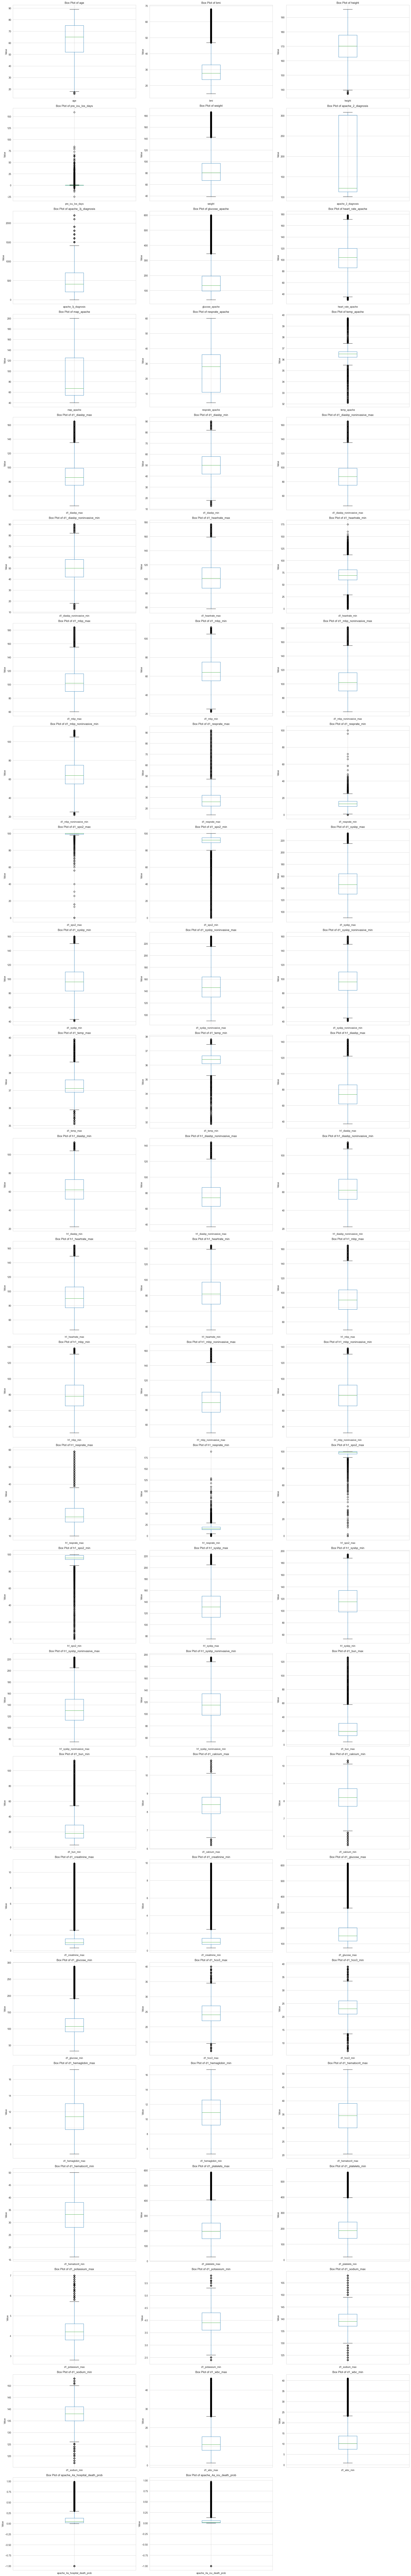

In [127]:
numeric_columns_copy = df_dropped.select_dtypes(include=['int', 'float']).columns

filtered_columns_copy = [col for col in numeric_columns_copy if len(df_dropped[col].unique()) > 7 and not col.endswith('_id')]

n_cols = 3
n_rows = (len(filtered_columns_copy) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 8, n_rows * 6)) 
axes = axes.flatten()

for i, column in enumerate(filtered_columns_copy):
    df_dropped.boxplot(column=column, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_ylabel('Value')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

#### Observation: 
1. Negative values are not considered in this dataset.

# Removing Outliers

In [128]:
for column in filtered_columns_copy:
    df_dropped[column] = df_dropped[column].apply(lambda x: np.nan if x < 0 else x)
df_filtered_outliers = df_dropped.dropna()


In [129]:
df_filtered_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44475 entries, 0 to 91712
Columns: 104 entries, encounter_id to apache_2_bodysystem
dtypes: float64(89), int64(8), object(7)
memory usage: 35.6+ MB


In [130]:
count=0
for col in df_filtered_outliers:
    if df_filtered_outliers[col].dtype == 'int64' or df_filtered_outliers[col].dtype == 'float64':
        print(f'-------------------------{count}:{col}-------------------------:\nMinimum Value: {df_filtered_outliers[col].min()}\nMaximum Value: {df_filtered_outliers[col].max()}')
        count=count+1

-------------------------0:encounter_id-------------------------:
Minimum Value: 3
Maximum Value: 131045
-------------------------1:patient_id-------------------------:
Minimum Value: 1
Maximum Value: 131051
-------------------------2:hospital_id-------------------------:
Minimum Value: 2
Maximum Value: 204
-------------------------3:hospital_death-------------------------:
Minimum Value: 0
Maximum Value: 1
-------------------------4:age-------------------------:
Minimum Value: 16.0
Maximum Value: 89.0
-------------------------5:bmi-------------------------:
Minimum Value: 14.84492591
Maximum Value: 67.81498973
-------------------------6:elective_surgery-------------------------:
Minimum Value: 0
Maximum Value: 1
-------------------------7:height-------------------------:
Minimum Value: 137.2
Maximum Value: 195.59
-------------------------8:icu_id-------------------------:
Minimum Value: 82
Maximum Value: 927
-------------------------9:pre_icu_los_days-------------------------:
Minimum

In [131]:
columns_to_process = [ 'bmi', 
    'glucose_apache', 'h1_spo2_max', 'h1_spo2_min', 
    'd1_glucose_max', 'd1_glucose_min'
]

for column in columns_to_process:

    Q1 = df_filtered_outliers[column].quantile(0.25)
    Q3 = df_filtered_outliers[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered_outliers = df_filtered_outliers[(df_filtered_outliers[column] >= lower_bound) & (df_filtered_outliers[column] <= upper_bound)]

# Box Plots after Outlier Removal

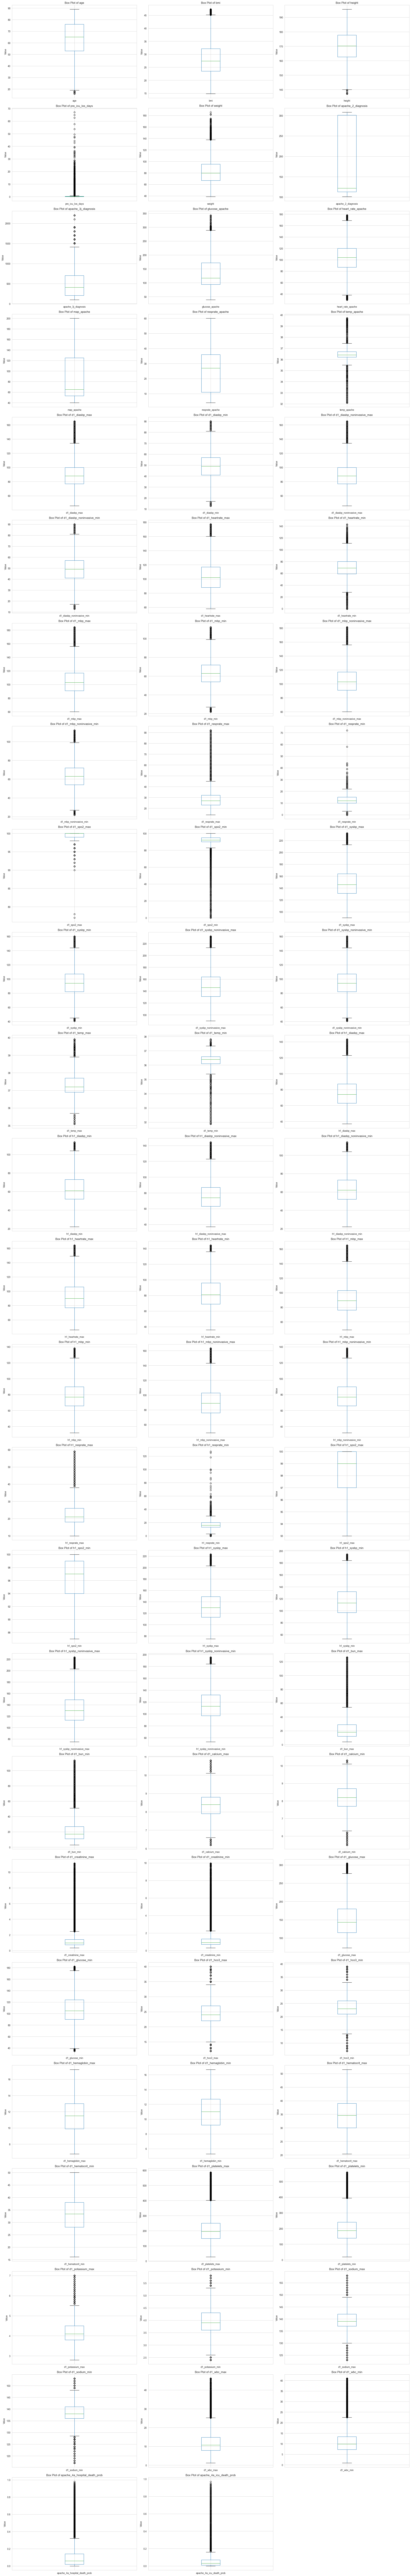

In [132]:
n_cols = 3
n_rows = (len(filtered_columns_copy) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 8, n_rows * 6)) 
axes = axes.flatten()

for i, column in enumerate(filtered_columns_copy):
    df_filtered_outliers.boxplot(column=column, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_ylabel('Value')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Checking for Q-Q Plot Comparision

/Users/vishal/anaconda3/envs/DM/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



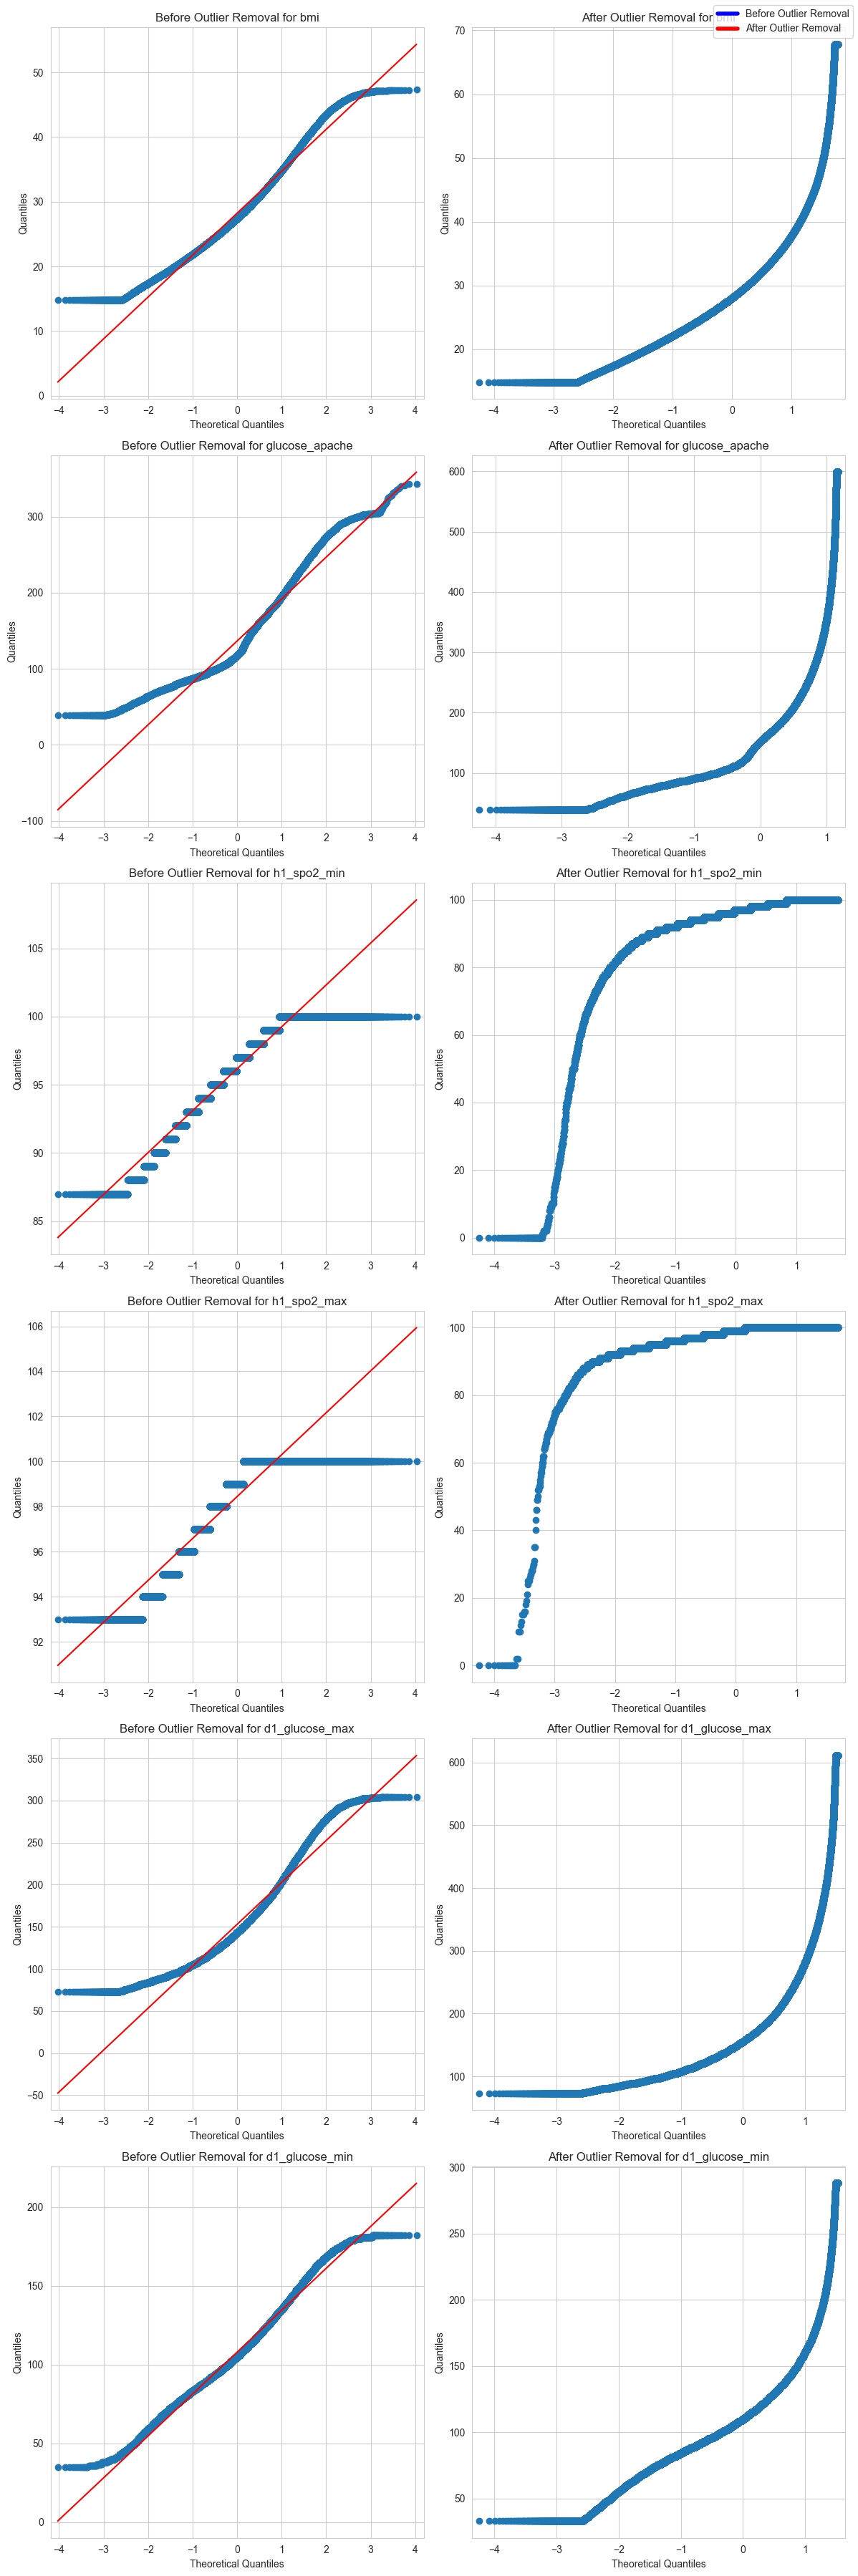

In [133]:
columns_to_compare = ['bmi', 'glucose_apache', 'h1_spo2_min', 'h1_spo2_max', 'd1_glucose_max', 'd1_glucose_min']

# Create subplots with 1 column for each DataFrame but multiple rows for each variable
fig, axes = plt.subplots(nrows=len(columns_to_compare), ncols=2, figsize=(12, 6 * len(columns_to_compare)))

for i, col in enumerate(columns_to_compare):
    # Plot for filtered outliers
    qqplot(df_filtered_outliers[col], line='s', ax=axes[i, 0], color='blue')
    axes[i, 0].set_title(f'Before Outlier Removal for {col}')  # Correcting the title placement
    axes[i, 0].set_ylabel('Quantiles')  # Setting y-label
    
    # Plot for dropped
    qqplot(df_dropped[col], line='s', ax=axes[i, 1], color='red')
    axes[i, 1].set_title(f'After Outlier Removal for {col}')  # Correcting the title placement
    axes[i, 1].set_ylabel('Quantiles')  # Setting y-label

# Creating a custom legend
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4)]
fig.legend(custom_lines, ['Before Outlier Removal', 'After Outlier Removal'], loc='upper right')

plt.tight_layout()
plt.show()

# Visualization: 


## Pie Chart for Survived and Dead: 

In [134]:
sns.set_style('whitegrid')

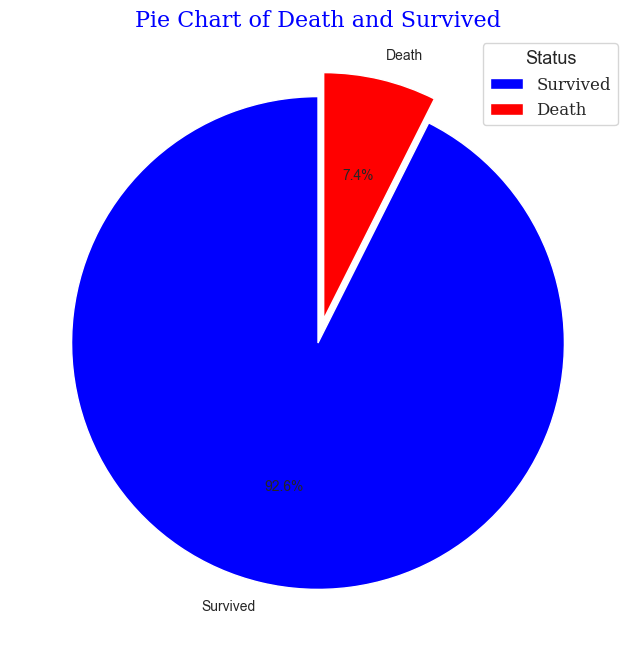

In [135]:
death_counts = df_filtered_outliers['hospital_death'].value_counts()
plt.figure(figsize=(8, 8)) 

plt.pie(death_counts, 
        labels=death_counts.index.map({0: 'Survived', 1: 'Death'}), 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['blue', 'red'], 
        explode=(0, 0.1))  
plt.title('Pie Chart of Death and Survived', fontdict={'fontname': 'serif', 'color': 'blue', 'fontsize': 16})

plt.legend(death_counts.index.map({0: 'Survived', 1: 'Death'}), 
           title="Status", 
           title_fontsize='13',  
           prop={'family': 'serif', 'size': 12}) 
plt.show()

## Checking for age distribution for dead patients

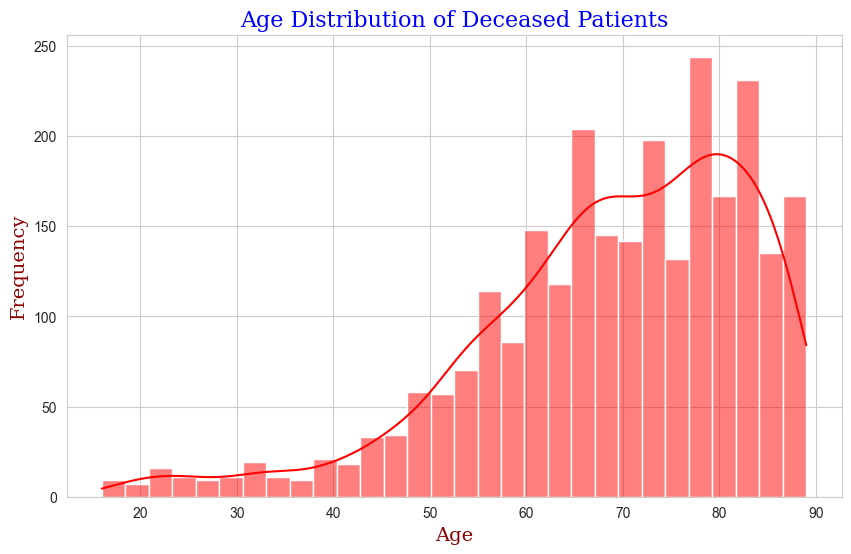

In [136]:
deceased_patients = df_filtered_outliers[df_filtered_outliers['hospital_death'] == 1]

plt.figure(figsize=(10, 6)) 
sns.histplot(deceased_patients['age'], bins=30, color='red', kde=True)
plt.title('Age Distribution of Deceased Patients', fontdict={'fontname': 'serif', 'color': 'blue', 'fontsize': 16})
plt.xlabel('Age', fontdict={'fontname': 'serif', 'color': 'darkred', 'fontsize': 14})
plt.ylabel('Frequency', fontdict={'fontname': 'serif', 'color': 'darkred', 'fontsize': 14})
plt.grid(True)
plt.show()

# Boxplot of Survived and Deceased Patients w.r.t Age

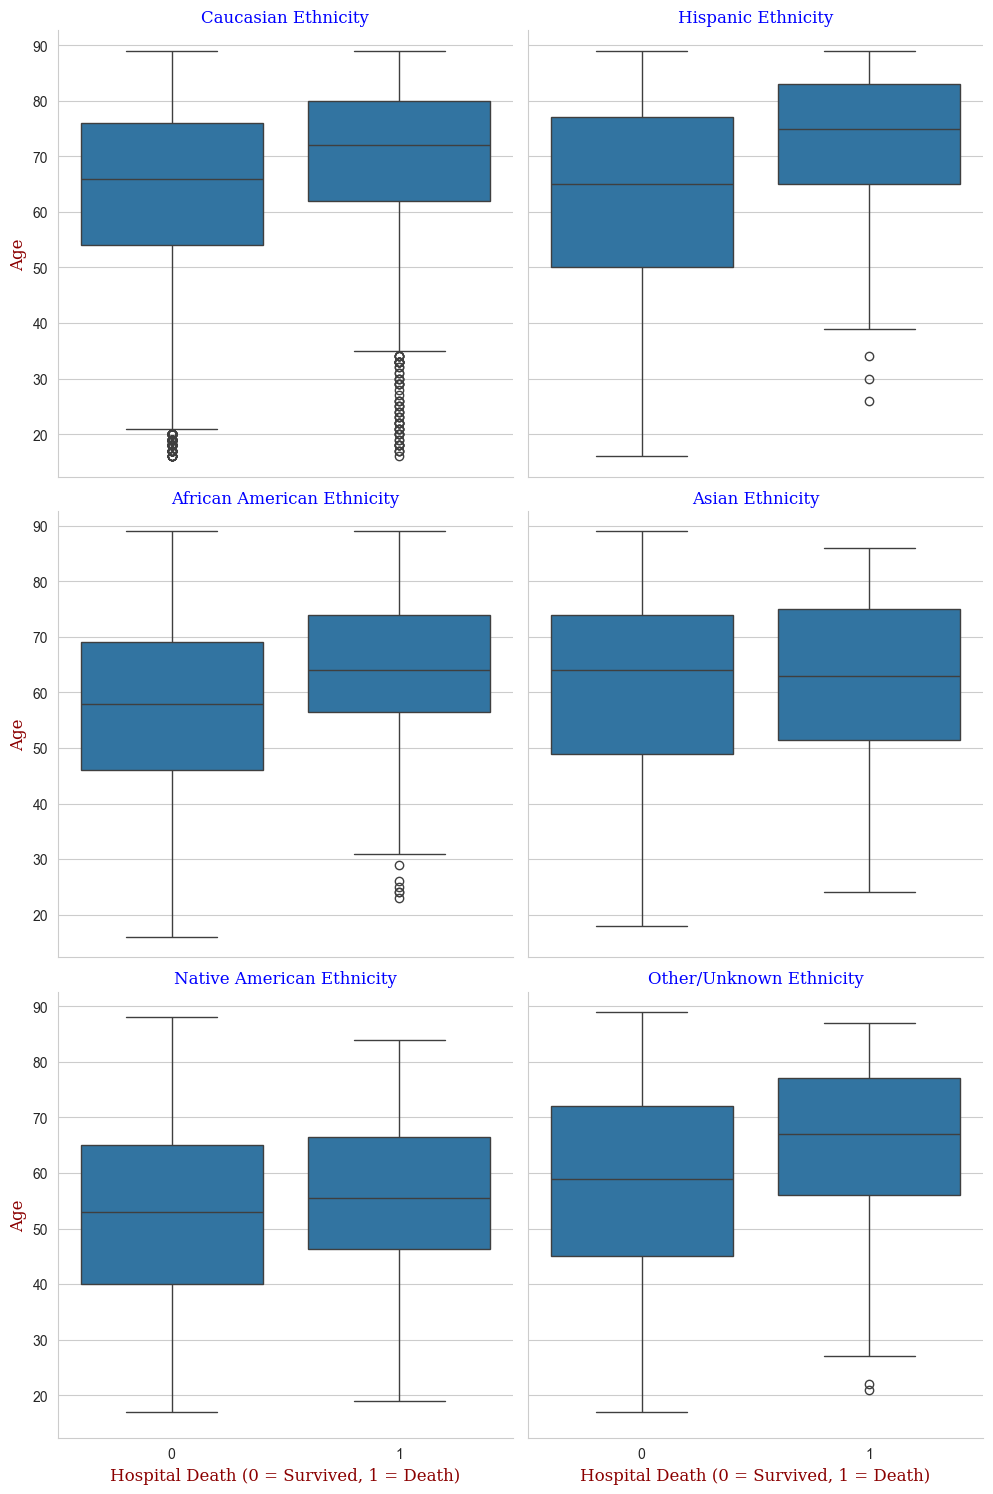

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the FacetGrid with 2 columns per row, which will automatically adjust to 3 rows if there are 6 unique ethnicities
g = sns.FacetGrid(df_filtered_outliers, col="ethnicity", col_wrap=2, height=5, aspect=1)

# Map a boxplot to the grid
g.map(sns.boxplot, 'hospital_death', 'age', order=[0, 1])

# Setting custom titles and labels with enhanced font properties
g.set_titles("{col_name} Ethnicity")
g.set_axis_labels("Hospital Death (0 = Survived, 1 = Death)", "Age")

# Customize each subplot in the FacetGrid
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontdict={'fontname': 'serif', 'color': 'blue', 'fontsize': 'large'})
    ax.set_xlabel(ax.get_xlabel(), fontdict={'fontname': 'serif', 'color': 'darkred', 'fontsize': 'large'})
    ax.set_ylabel(ax.get_ylabel(), fontdict={'fontname': 'serif', 'color': 'darkred', 'fontsize': 'large'})
    ax.xaxis.label.set_size(12)
    ax.yaxis.label.set_size(12)

# Show the plot
plt.show()


# Ethnicity vs Deceased

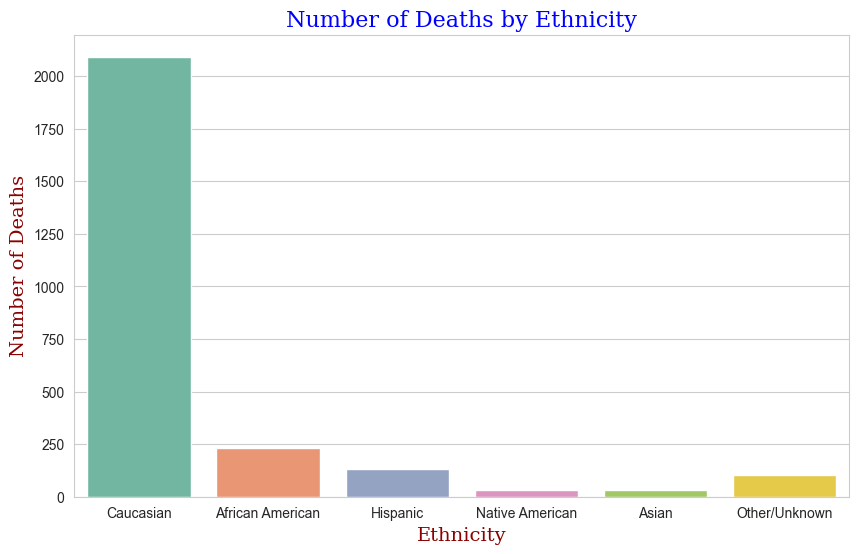

In [138]:
deaths_by_ethnicity = df_filtered_outliers[df_filtered_outliers['hospital_death'] == 1]

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=deaths_by_ethnicity, x='ethnicity', hue='ethnicity', palette='Set2', dodge=False, legend=False)
plt.title('Number of Deaths by Ethnicity', fontdict={'fontname': 'serif', 'color': 'blue', 'fontsize': 16})
plt.xlabel('Ethnicity', fontdict={'fontname': 'serif', 'color': 'darkred', 'fontsize': 14})
plt.ylabel('Number of Deaths', fontdict={'fontname': 'serif', 'color': 'darkred', 'fontsize': 14})

plt.show()

# Dashboard

In [139]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
my_app = Dash('My App', external_stylesheets=external_stylesheets)

server = my_app.server

# Entire Layout
my_app.layout = html.Div([html.H1(children='Homework',
                                  style={'textAlign': 'center'}),

                          html.Br(),
                          dcc.Tabs(id='hw-questions',
                                   children=[
                                       dcc.Tab(label='Question 1', value='q1'),
                                       dcc.Tab(label='Question 2', value='q2'),
                                       dcc.Tab(label='Question 3', value='q3'),
                                       dcc.Tab(label='Question 4', value='q4'),
                                       dcc.Tab(label='Question 5', value='q5'),
                                       dcc.Tab(label='Question 6', value='q6')
                                   ]
                                   ),
                          html.Div(id='layout')

                          ]
                         )


# Callback to update layout based on selected tab
@my_app.callback(
    Output('layout', 'children'),
    [Input('hw-questions', 'value')]
)
def update_layout(ques):
    if ques == 'q1':
        return Question1_layout
    elif ques == 'q2':
        return Question2_layout
    elif ques == 'q3':
        return Question3_layout
    elif ques == 'q4':
        return Question4_layout
    elif ques == 'q5':
        return Question5_layout
    elif ques == 'q6':
        return Question6_layout



NameError: name 'dcc' is not defined